In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
from PIL import Image
import os
from plot_utils import multiplot, doubleplot, doubleplotline, multiplotline
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from Strip2DFFT import doFilterFFT, do2DFFT, do2DInverseFFT, CrossCorrelation, CrossCorrelationStrip

In the block below specify the target directory in which the result images would be written. Specify the full path to the Kymograph image for curvature and intensity to compute auto and cross correlation peaks for both. The axes keyword tells the program that it is seeing an X-Y image

In [2]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/CrossCorrelation/'
sourceimageA = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/curvature_kymograph_20um_1.tif'
sourceimageB = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/intensity_kymograph_20um_1.tif'

SaveFileName = "Curvature-Curvature";

base = os.path.split(sourceimageA)[-1]

Filename = os.path.splitext(base)
axes = 'YX'

In the block below we read the two images using custom made imread function for tifffiles

In [3]:
imageA = imread(sourceimageA)
imageB = imread(sourceimageB)



In the block below we compute autocorrelation and crosscorrelation of Curvature-Curvature and Curvature-Intensity by making a strip along time axis at t = 0 and correlating it with all the strips at t > 0 and then adding up the correlations 

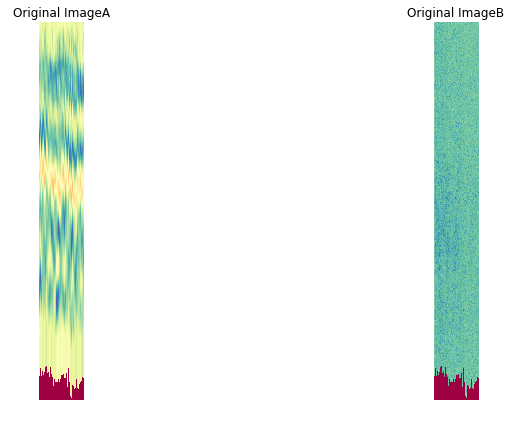

In [4]:
crosscorrelation = CrossCorrelationStrip(imageA, imageB)
autocorrelationCurve = CrossCorrelationStrip(imageA, imageA)
autocorrelationIntensity = CrossCorrelationStrip(imageB, imageB)
doubleplot(imageA, imageB, "Original ImageA", "Original ImageB")



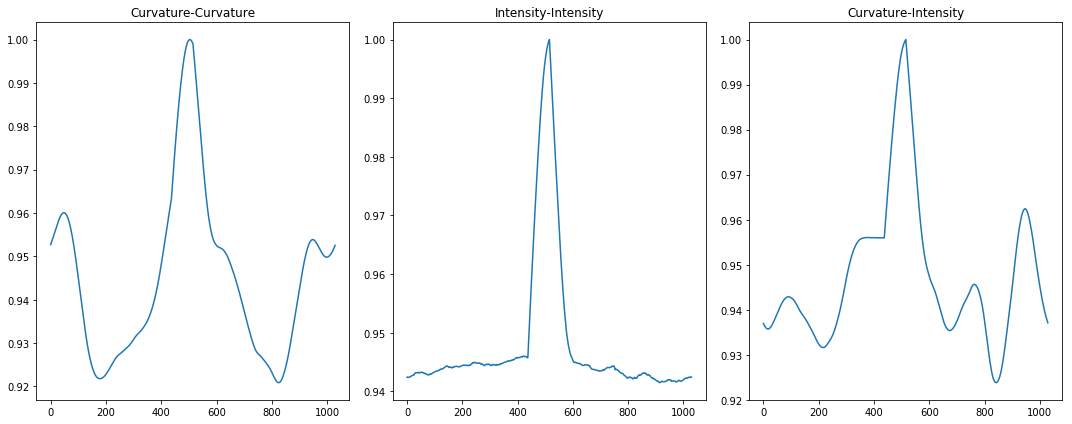

In [5]:
multiplotline(autocorrelationCurve, autocorrelationIntensity, crosscorrelation, "Curvature-Curvature","Intensity-Intensity", "Curvature-Intensity" )
